In [1]:
import torch 
import numpy as np 
from torch.autograd import Variable

In [2]:
# 读入数据 x 和 y
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

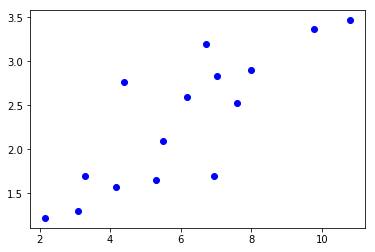

In [3]:
import matplotlib.pyplot as plt
plt.plot(x_train, y_train, 'bo')

In [4]:
x_train = Variable(torch.from_numpy(x_train))
y_train = Variable(torch.from_numpy(y_train))

In [5]:
w = Variable(torch.randn(1), requires_grad=True)
b = Variable(torch.randn(1), requires_grad=True)

def linear_model(x):
    return w * x + b

In [6]:
y_ = linear_model(x_train)

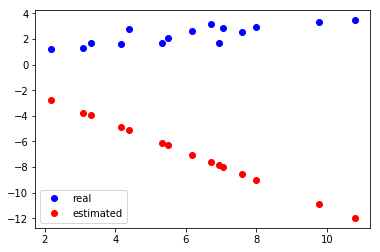

In [7]:
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

In [8]:
def get_loss(y_, y):
    return torch.mean((y_ - y) ** 2)

loss = get_loss(y_, y_train)

In [9]:
loss

tensor(95.4967, grad_fn=<MeanBackward1>)

In [10]:
loss.backward()

In [11]:
print(w.grad)
print(b.grad)

tensor([-126.9188])
tensor([-18.4958])


In [12]:
w.data -= w.grad * 1e-2
b.data -= b.grad * 1e-2

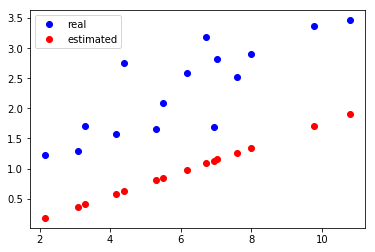

In [13]:
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

In [14]:
for e in range(10):
    y_ = linear_model(x_train)
    
    loss = get_loss(y_, y_train)
    
    w.grad.zero_()               
    b.grad.zero_()                   
    loss.backward()
    
    w.data -= w.grad * 1e-2
    b.data -= b.grad * 1e-2
    
    print('epoch: {}, loss: {}'.format(e, loss.data))

epoch: 0, loss: 2.0545411109924316
epoch: 1, loss: 0.3246111571788788
epoch: 2, loss: 0.29197636246681213
epoch: 3, loss: 0.2907557785511017
epoch: 4, loss: 0.2901199460029602
epoch: 5, loss: 0.289497971534729
epoch: 6, loss: 0.2888794243335724
epoch: 7, loss: 0.2882639765739441
epoch: 8, loss: 0.28765174746513367
epoch: 9, loss: 0.2870425879955292


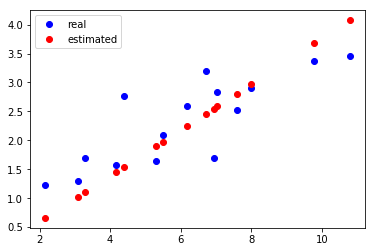

In [15]:
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

In [16]:
w_target = np.array([0.5, 3, 2.4]) # 定义参数
b_target = np.array([0.9]) # 定义参数

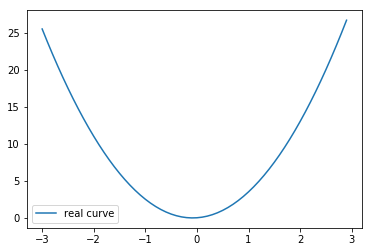

In [17]:
x_sample = np.arange(-3, 3, 0.1)
y_sample = w_target[0] * x_sample + w_target[1] * x_sample ** 2 
+ w_target[2] * x_sample ** 3 + b_target

plt.plot(x_sample, y_sample, label='real curve')
plt.legend()

In [18]:
x_train = np.stack([x_sample ** i for i in range(1, 4)], axis=1)
x_train = torch.from_numpy(x_train).float()

In [19]:
y_train = torch.from_numpy(y_sample).float().unsqueeze(1)

In [20]:
y_train.size()

torch.Size([60, 1])

In [21]:
w = Variable(torch.randn(3,1), requires_grad=True)

In [22]:
b = Variable(torch.randn(1), requires_grad=True)

In [23]:
def multi_linear(x):
    return torch.mm(x, w) + b

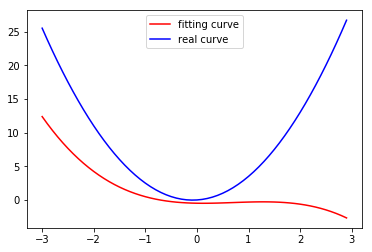

In [24]:
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()

In [38]:
loss = get_loss(y_pred, y_train)

In [40]:
loss.backward()

In [47]:
for e in range(100):
    y_pred = multi_linear(x_train)
    loss = get_loss(y_pred, y_train)
        
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    loss.backward()
    
    w.data -= 1e-3 * w.grad.data
    b.data -= 1e-3 * b.grad.data
    if (e + 1) % 20 == 0:
        print('epoch: {}, loss: {}'.format(e, loss))

epoch: 19, loss: 1.326461911201477
epoch: 39, loss: 1.2702667713165283
epoch: 59, loss: 1.223803162574768
epoch: 79, loss: 1.1809593439102173
epoch: 99, loss: 1.1401159763336182


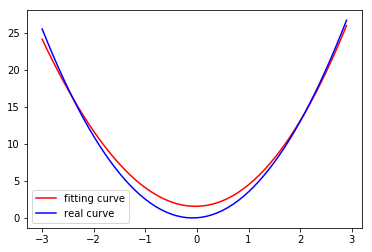

In [48]:
# 画出更新之后的结果
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()